&#x202b;
# بخش دوم - CIFAR-10
## محمدرضا کیانی - ۸۱۰۱۹۴۳۸۸

&#x202b;
۱- Turn the image to grayscale: در این تکنیک عکس را سیاه سفید می‌کنند و مولفه‌های RGB را از عکس حذف می‌کنند.
 علت انجام این کار این است که روشنایی با اختلاف اهمیت بیشتری در تمایز فیچرهای تصویر دارد و همچنین با انجام آن، کاهش حجم داده‌ها روبه‌رو می‌شویم.<br>
&#x202b;
۲- PCA: همان‌طور که در قسمت ۲۷ بخش اول توضیح داده‌ شد، PCA روشی است برای کاهش ابعداد بردار ویژگی و ویژگی‌های با اهمیت را در قالب مولفه‌هایی جدید به دست می‌آورد.
کاربر آن کاهش حجم داده‌ها، در نظر نگرفتن اطلاعات مربوط به فیچرهای کم اهمیت با شناسایی فیچر های مهم‌تر می‌باشد.<br>
&#x202b;
۳- Random Projection: یک روش برای کاهش بعد داده‌هاست. به این شکل که یک بردار n بعدی را به برداری k بعدی کاهش می دهد. 
این عملیات با ضرب شدن یک بردار k * n بعدی که بعضی از درایه‌های ان به شکل رندوم با مقادیر یکه پر شده در بردار اولیه انجام می‌شود.
همانند PCA این کار باعث کم شدن پیچیدگی داده ها و کاهش حجم می‌شود تا راحت‌تر با داده‌ها کار کنیم.<br>
&#x202b;
۴- Augmentation: این تکنیک به منظور تولید داده‌های جدید اما ساختگی و با تغییر روی داده‌ی اثلی استفاده می‌شود.
به این شکل که در یادگیری ماشین ما به داده با تعداد زیاد نیاز داریم تا نتیجه‌ی بهتری بگیریم. هنگامی که داده‌های ما کم باشند، می تواینم از این تکنیک استفاده کنیم و با تغییراتی مانند تغییر روشنایی، بزرگ نمایی، پس زمینه و موقعیت جعفرافیایی، عممومی یا افقی کردن و یا چرخش عکس و بسیاری روش‌های دیگر داده‌ی جدید مصنوعی ایجاد کنیم تا حجم داده‌هایمان را بیشتر کنیم و یادگیری عمیق‌تر و بهتری داشته باشیم.
همچنین انجام این تکنیک موجب می‌شود تا از یادگیری پترن‌های نا مرتبط جلوگیری شود؛ مثلا اگر یک نوع ماشین در داده‌ی train رو به راست تصویر و نوعی دیگر رو به چپ تصویر باشند و جای این‌ها در داده‌ی تست برعکس شود، شبکه‌ی عصبی یا سیستم لرن شده ممکن است جواب اشتباهی را به ما بدهد چرا که خوبی و درستی کار مدل‌مان به داده‌هایی که به او داده‌ایم، به شدت وابسته است. 

&#x202b;
من برای این تمرین با محدودیت ریسورس مواجه بودم و روی سیستم خودم با سرعت ایده‌آلی نمی‌توانستم کد را اجرا کنم. به همین دلیل به colab گوگل رفتم و آن‌جا فایل‌های پروژه‌را آپلود کردم.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving assignment_4_dataset.zip to assignment_4_dataset.zip
User uploaded file "assignment_4_dataset.zip" with length 211422300 bytes


In [0]:
!ls -la

total 206492
drwxr-xr-x 1 root root      4096 May 22 20:35 .
drwxr-xr-x 1 root root      4096 May 22 19:31 ..
-rw-r--r-- 1 root root 211422300 May 22 21:21 assignment_4_dataset.zip
drwxr-xr-x 1 root root      4096 May 20 16:07 .config
drwxr-xr-x 2 root root      4096 May 22 19:32 .ipynb_checkpoints
drwxr-xr-x 1 root root      4096 May 15 16:23 sample_data


&#x202b;
سپس فایل داده را به درایو خود منتقل کردم . برای این کار لازم بود ابتدا درایو را mount کنم و سپس فایل را به آن کپی کنم.<br>
&#x202b;
البته در سری‌های بعدی برعکس این روش عمل کردم و فایل زیپ را از درایو خود به فایل‌سیستم colab منتقل می‌کردم چرا که فایل‌سیستم colab حافظه‌ی زمان‌داری دارد و داده‌ها را نگه نمی‌دارد. 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/

'My Drive'


&#x202b;
 انتقال داده از درایو به colab

In [0]:
!cp /content/gdrive/My\ Drive/Colab\ Notebooks/assignment_4_dataset.zip ./

In [3]:
!unzip assignment_4_dataset.zip

Archive:  assignment_4_dataset.zip
   creating: dataset/
   creating: dataset/MNIST/
  inflating: dataset/MNIST/test_label.csv  
   creating: __MACOSX/
   creating: __MACOSX/dataset/
   creating: __MACOSX/dataset/MNIST/
  inflating: __MACOSX/dataset/MNIST/._test_label.csv  
  inflating: dataset/MNIST/train_data.csv  
  inflating: dataset/MNIST/train_label.csv  
  inflating: __MACOSX/dataset/MNIST/._train_label.csv  
  inflating: dataset/MNIST/test_data.csv  
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/CIFAR10/
  inflating: dataset/CIFAR10/CIFAR10_val_label.csv  
  inflating: dataset/CIFAR10/CIFAR10_train_label.csv  
   creating: __MACOSX/dataset/CIFAR10/
  inflating: __MACOSX/dataset/CIFAR10/._CIFAR10_train_label.csv  
  inflating: dataset/CIFAR10/CIFAR10_train_data.csv  
  inflating: dataset/CIFAR10/CIFAR10_val_data.csv  
  inflating: dataset/CIFAR10/CIFAR10_test_data.csv  
  inflating: __MACOSX/dataset/CIFAR10/._CIFAR10_test_

In [0]:
!rm -rf __MACOSX/

&#x202b;
خواندن ورودی‌های train و validation و  test

In [24]:
import pandas as pd

train_data = pd.read_csv('dataset/CIFAR10/CIFAR10_train_data.csv', header=None)
train_label = pd.read_csv('dataset/CIFAR10/CIFAR10_train_label.csv', header=None)[0]
print("Train data size:", len(train_data))

val_data = pd.read_csv('dataset/CIFAR10/CIFAR10_val_data.csv', header=None)
val_label = pd.read_csv('dataset/CIFAR10/CIFAR10_val_label.csv', header=None)[0]
print("Validate data size:", len(val_data))

test_data = pd.read_csv('dataset/CIFAR10/CIFAR10_test_data.csv', header=None)
print("Test data size:", len(test_data))

Train data size: 49000
Validate data size: 1000
Test data size: 10000


&#x202b;
تست کردن داده‌ها با به نمایش در آوردن تصویر یکی از آن‌ها

image: 16697 label: ship


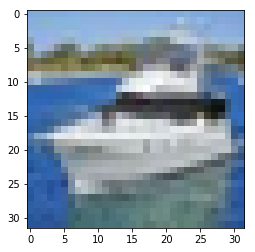

In [25]:
from PIL import Image
import random
import matplotlib.pyplot as plt
%matplotlib inline

def show_rgb_image(image_data):
    def group(lst, n):
        result = []
        for i in range(0, len(lst), n):
            result.append(tuple(lst[i:i+n])) 
        return result
    
    index_data = image_data.values.tolist()
    index_data = group(index_data, 3)
    
    img = Image.new('RGB', (32, 32))
    img.putdata(index_data)
    plt.imshow(img)    


index = random.randint(0, len(train_data))
index_label = train_label.iloc[index]
print("image:", index, "label:", index_label)
show_rgb_image(train_data.iloc[index])

&#x202b;
برای آماده‌سازی داده‌ها من ابتدا آن‌ها را greyscale می‌کنم که کد زیر تابع این کار است

In [0]:
def show_greyscale_image(image_data):
    img = Image.new('L', (32, 32))
    img.putdata(image_data)
    plt.imshow(img)
    
def make_images_greyscale(df):
    def greyscale(data):
        r, g, b = data
        return r * 299/1000 + g * 587/1000 + b * 114/1000
    
    print("start greyscaling images")
    total_count = len(df)
    part = total_count / 20
    greyscale_image = [[] for i in range(len(df))]
    for i, image in df.iterrows():
        row = image.tolist()
        for j in range(0, len(row), 3):
            greyscale_image[i].append(greyscale(row[j:j+3])) 
        
        if i % part == 0:
            print("progress:", (i/total_count)*100, "%")
    print("complete")
    
    return greyscale_image

&#x202b;
انجام عملیات greyscale روی داده‌ها

In [27]:
train_images = make_images_greyscale(train_data)

start greyscaling images
progress: 0.0 %
progress: 5.0 %
progress: 10.0 %
progress: 15.0 %
progress: 20.0 %
progress: 25.0 %
progress: 30.0 %
progress: 35.0 %
progress: 40.0 %
progress: 45.0 %
progress: 50.0 %
progress: 55.00000000000001 %
progress: 60.0 %
progress: 65.0 %
progress: 70.0 %
progress: 75.0 %
progress: 80.0 %
progress: 85.0 %
progress: 90.0 %
progress: 95.0 %
complete


&#x202b;
نمایش یک داده‌ی سیاه سفید شده

image: 23413 label: frog


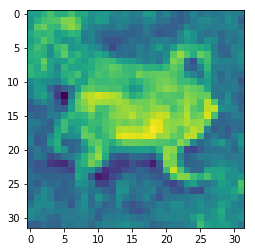

In [28]:
index = random.randint(0, len(train_data))
index_label = train_label.iloc[index]
print("image:", index, "label:", index_label)

show_greyscale_image(train_images[index])

In [29]:
val_images = make_images_greyscale(val_data)

start greyscaling images
progress: 0.0 %
progress: 5.0 %
progress: 10.0 %
progress: 15.0 %
progress: 20.0 %
progress: 25.0 %
progress: 30.0 %
progress: 35.0 %
progress: 40.0 %
progress: 45.0 %
progress: 50.0 %
progress: 55.00000000000001 %
progress: 60.0 %
progress: 65.0 %
progress: 70.0 %
progress: 75.0 %
progress: 80.0 %
progress: 85.0 %
progress: 90.0 %
progress: 95.0 %
complete


In [30]:
test_images = make_images_greyscale(test_data)

start greyscaling images
progress: 0.0 %
progress: 5.0 %
progress: 10.0 %
progress: 15.0 %
progress: 20.0 %
progress: 25.0 %
progress: 30.0 %
progress: 35.0 %
progress: 40.0 %
progress: 45.0 %
progress: 50.0 %
progress: 55.00000000000001 %
progress: 60.0 %
progress: 65.0 %
progress: 70.0 %
progress: 75.0 %
progress: 80.0 %
progress: 85.0 %
progress: 90.0 %
progress: 95.0 %
complete


&#x202b;
در این بخش من روی داده‌ها PCA می‌زنم که مرحله‌ی آخر آماده‌سازی داده‌هاست.
&#x202b;
من یک بار نیز داده‌ها را بدون greyscale کردن، نرمال کردم وآن‌ها را به بازه‌ی -۱ تا ۱ بردم اما تاثیری در دقت داده‌ها نداشت و فقط الگوریتم Logestic Regression بود که از دقت ۳۰٪ به دقت ۴۰٪ رسید ولی برای باقی روش‌ها تاثیر چندانی نداشت.

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

normal_flag = False

if normal_flag:  
  scaler = StandardScaler()
  scaler.fit(train_data)

  normal_train_data = scaler.transform(train_data)
  normal_val_data = scaler.transform(val_data)
  normal_test_data = scaler.transform(test_data)
  
  pca = PCA(n_components=40)
  principal_train_components = pca.fit_transform(normal_train_data)
  principal_val_components = pca.transform(normal_val_data)
  principal_test_components = pca.transform(normal_test_data)
else:
  pca = PCA(n_components=30)
  principal_train_components = pca.fit_transform(train_images)
  principal_val_components = pca.transform(val_images)
  principal_test_components = pca.transform(test_images)

## Logestic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(principal_train_components, train_label)

pred = lr.predict(principal_train_components)
train_accuracy = accuracy_score(train_label, pred)

pred = lr.predict(principal_val_components)
test_accuracy = accuracy_score(val_label, pred)

print("Logistic Regression accuracy score")
print("\ttrain:", train_accuracy, "test:", test_accuracy)

## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(principal_train_components, train_label)

pred = neigh.predict(principal_train_components)
train_accuracy = accuracy_score(train_label, pred)

pred = neigh.predict(principal_val_components)
test_accuracy = accuracy_score(val_label, pred)

print ("K-Nearest Neighbors accuracy score for PCA data")
print ("\tFor n_neighbors =", 12, "train:", train_accuracy, "test:", test_accuracy)

K-Nearest Neighbors accuracy score for PCA data
	For n_neighbors = 12 train: 0.49573469387755104 test: 0.345


&#x202b;
تلاش برای tune کردن  روش KNN که نتیجه بخش نبود و به دقت بالای ۴۰ نمی‌رسید.

K-Nearest Neighbors accuracy score
	For n_neighbors = 1 test: 0.412
	For n_neighbors = 2 test: 0.364
	For n_neighbors = 3 test: 0.387
	For n_neighbors = 4 test: 0.395
	For n_neighbors = 5 test: 0.396
	For n_neighbors = 6 test: 0.385
	For n_neighbors = 7 test: 0.388
	For n_neighbors = 8 test: 0.391
	For n_neighbors = 9 test: 0.388
	For n_neighbors = 10 test: 0.393
	For n_neighbors = 11 test: 0.395
	For n_neighbors = 12 test: 0.393
	For n_neighbors = 13 test: 0.386
	For n_neighbors = 14 test: 0.395
	For n_neighbors = 15 test: 0.393
	For n_neighbors = 16 test: 0.392
	For n_neighbors = 17 test: 0.383
	For n_neighbors = 18 test: 0.391
	For n_neighbors = 19 test: 0.382


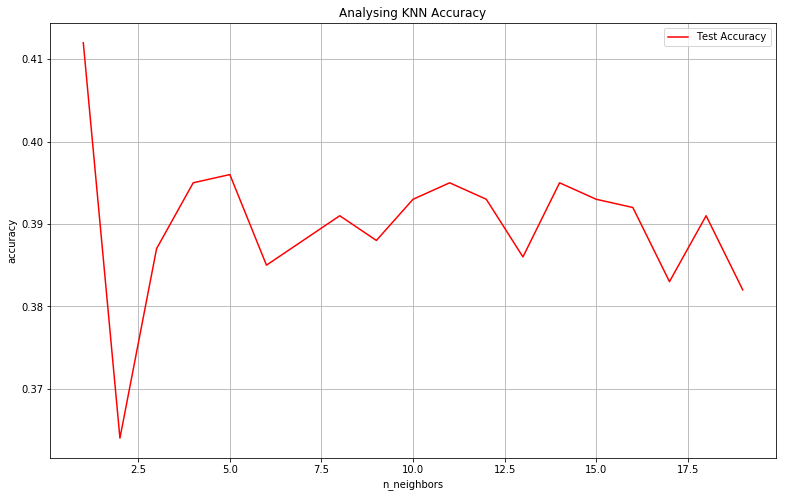

In [0]:
n_neighbors = range(1, 20)
# train_accuracy = []
test_accuracy = []
print ("K-Nearest Neighbors accuracy score")
for n in n_neighbors:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(principal_train_components, train_label)
    
#     pred = neigh.predict(train_data)
#     train_accuracy.append(accuracy_score(train_label, pred))
    
    pred = neigh.predict(principal_val_components)
    test_accuracy.append(accuracy_score(val_label, pred))
    
    print ("\tFor n_neighbors =", n, "test:", test_accuracy[-1])
    
plt.figure(figsize=(13,8))
# plt.plot(n_neighbors, train_accuracy, '-r', label='Train Accuracy', c='green')
plt.plot(n_neighbors, test_accuracy, '-r', label='Test Accuracy', c='red')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.title('Analysing KNN Accuracy')
plt.legend()
plt.grid()
plt.show()

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=31)
rf.fit(principal_train_components, train_label)

pred = rf.predict(principal_train_components)
train_accuracy = accuracy_score(train_label, pred)

pred = rf.predict(principal_val_components)
test_accuracy = accuracy_score(val_label, pred)

print ("\tFor n_estimators =", 31, "train:", train_accuracy, "test:", test_accuracy)

	For n_estimators = 31 train: 1.0 test: 0.382


&#x202b;
 تلاش برای tune کردن پارامتر n_estimators در جنگل تصادفی

Random forest accuracy score
	For n_estimators = 1 test: 0.7093061224489796 test: 0.227
	For n_estimators = 2 test: 0.7078163265306122 test: 0.202
	For n_estimators = 4 test: 0.9073673469387755 test: 0.261
	For n_estimators = 8 test: 0.9853877551020408 test: 0.278
	For n_estimators = 16 test: 0.9989183673469387 test: 0.342
	For n_estimators = 32 test: 0.9999591836734694 test: 0.39
	For n_estimators = 45 test: 1.0 test: 0.423
	For n_estimators = 64 test: 1.0 test: 0.414
	For n_estimators = 80 test: 1.0 test: 0.432
	For n_estimators = 100 test: 1.0 test: 0.432
	For n_estimators = 140 test: 1.0 test: 0.429
	For n_estimators = 170 test: 1.0 test: 0.453
	For n_estimators = 200 test: 1.0 test: 0.439


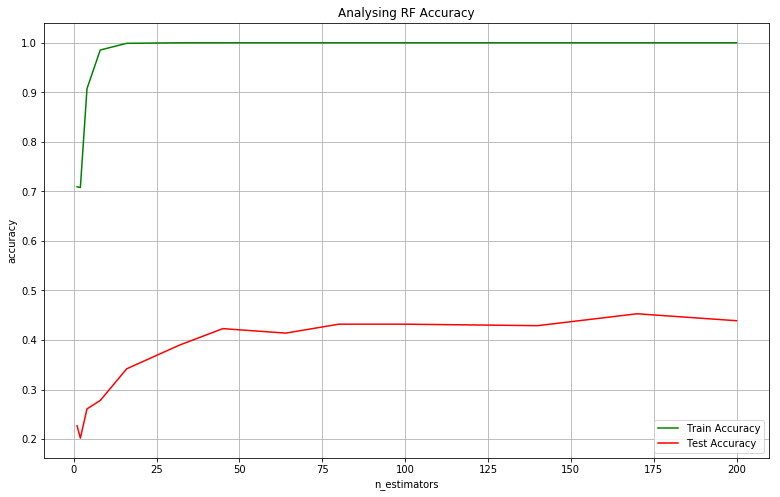

In [34]:
tune_range = [1, 2, 4, 8, 16, 32, 45, 64, 80, 100, 140, 170, 200]
train_accuracy = []
test_accuracy = []
print ("Random forest accuracy score")
for n in tune_range:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(principal_train_components, train_label)
    
    pred = rf.predict(principal_train_components)
    train_accuracy.append(accuracy_score(train_label, pred))
    
    pred = rf.predict(principal_val_components)
    test_accuracy.append(accuracy_score(val_label, pred))
    
    print ("\tFor n_estimators =", n, "test:", train_accuracy[-1], "test:", test_accuracy[-1])
    
plt.figure(figsize=(13,8))
plt.plot(tune_range, train_accuracy, '-r', label='Train Accuracy', c='green')
plt.plot(tune_range, test_accuracy, '-r', label='Test Accuracy', c='red')
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title('Analysing RF Accuracy')
plt.legend()
plt.grid()
plt.show()

&#x202b;
 تلاش برای tune کردن پارامتر max_depth در جنگل تصادفی

Random forest accuracy score
	For max_depth = 1.0 test: 0.214
	For max_depth = 5.2 test: 0.321
	For max_depth = 9.4 test: 0.362
	For max_depth = 13.600000000000001 test: 0.385
	For max_depth = 17.8 test: 0.38
	For max_depth = 22.0 test: 0.402
	For max_depth = 26.200000000000003 test: 0.4
	For max_depth = 30.400000000000002 test: 0.393
	For max_depth = 34.6 test: 0.386
	For max_depth = 38.800000000000004 test: 0.385
	For max_depth = 43.0 test: 0.393
	For max_depth = 47.2 test: 0.39
	For max_depth = 51.400000000000006 test: 0.395
	For max_depth = 55.6 test: 0.385
	For max_depth = 59.800000000000004 test: 0.43
	For max_depth = 64.0 test: 0.398


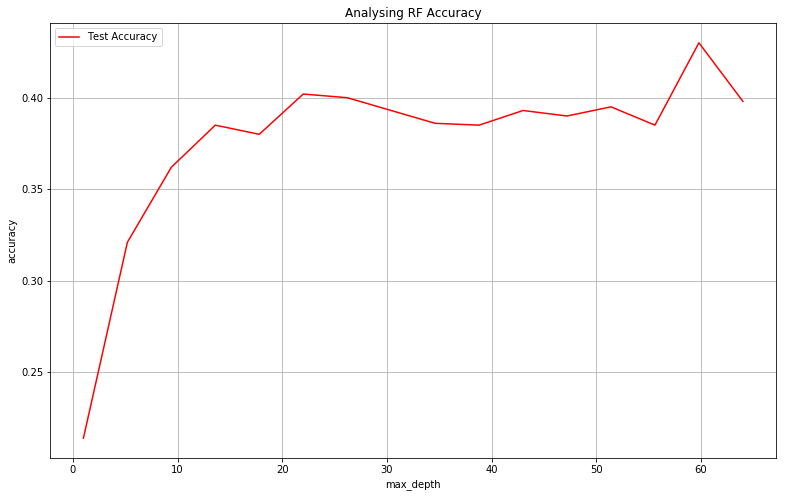

In [0]:
import numpy as np

tune_range = np.linspace(1, 64, 16, endpoint=True)
test_accuracy = []
print ("Random forest accuracy score")
for n in tune_range:
    rf = RandomForestClassifier(n_estimators=32, max_depth=n)
    rf.fit(principal_train_components, train_label)
        
    pred = rf.predict(principal_val_components)
    test_accuracy.append(accuracy_score(val_label, pred))
    
    print ("\tFor max_depth =", n, "test:", test_accuracy[-1])
    
plt.figure(figsize=(13,8))
plt.plot(tune_range, test_accuracy, '-r', label='Test Accuracy', c='red')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title('Analysing RF Accuracy')
plt.legend()
plt.grid()
plt.show()

&#x202b;
 تلاش برای tune کردن پارامتر min_samples_split در جنگل تصادفی

Random forest accuracy score
	For min_samples_split = 2 test: 0.399
	For min_samples_split = 12 test: 0.402
	For min_samples_split = 23 test: 0.404
	For min_samples_split = 34 test: 0.399
	For min_samples_split = 45 test: 0.395
	For min_samples_split = 56 test: 0.391
	For min_samples_split = 67 test: 0.394
	For min_samples_split = 78 test: 0.391
	For min_samples_split = 89 test: 0.4
	For min_samples_split = 100 test: 0.393


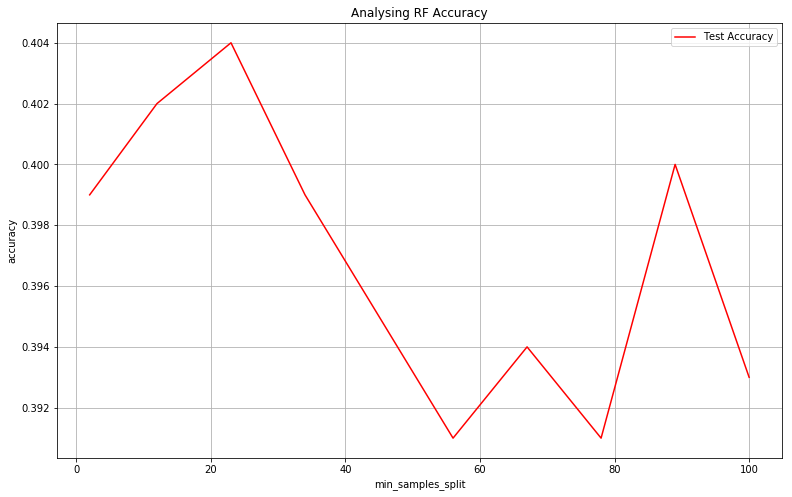

In [18]:
tune_range = list(map(int, np.linspace(2, 100, 10, endpoint=True)))
test_accuracy = []
print ("Random forest accuracy score")
for n in tune_range:
    rf = RandomForestClassifier(n_estimators=32, max_depth=23, min_samples_split=n)
    rf.fit(principal_train_components, train_label)
        
    pred = rf.predict(principal_val_components)
    test_accuracy.append(accuracy_score(val_label, pred))
    
    print ("\tFor min_samples_split =", n, "test:", test_accuracy[-1])
    
plt.figure(figsize=(13,8))
plt.plot(tune_range, test_accuracy, '-r', label='Test Accuracy', c='red')
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.title('Analysing RF Accuracy')
plt.legend()
plt.grid()
plt.show()

&#x202b;
 تلاش برای tune کردن پارامتر min_samples_leaf در جنگل تصادفی

Random forest accuracy score
	For min_samples_leaf = 1 test: 0.381
	For min_samples_leaf = 11 test: 0.407
	For min_samples_leaf = 21 test: 0.39
	For min_samples_leaf = 31 test: 0.387
	For min_samples_leaf = 41 test: 0.388
	For min_samples_leaf = 51 test: 0.367
	For min_samples_leaf = 61 test: 0.379
	For min_samples_leaf = 71 test: 0.356
	For min_samples_leaf = 81 test: 0.375
	For min_samples_leaf = 91 test: 0.367
	For min_samples_leaf = 101 test: 0.357
	For min_samples_leaf = 111 test: 0.353
	For min_samples_leaf = 121 test: 0.354
	For min_samples_leaf = 131 test: 0.362
	For min_samples_leaf = 141 test: 0.368
	For min_samples_leaf = 151 test: 0.356
	For min_samples_leaf = 161 test: 0.343
	For min_samples_leaf = 171 test: 0.36
	For min_samples_leaf = 181 test: 0.351
	For min_samples_leaf = 191 test: 0.354


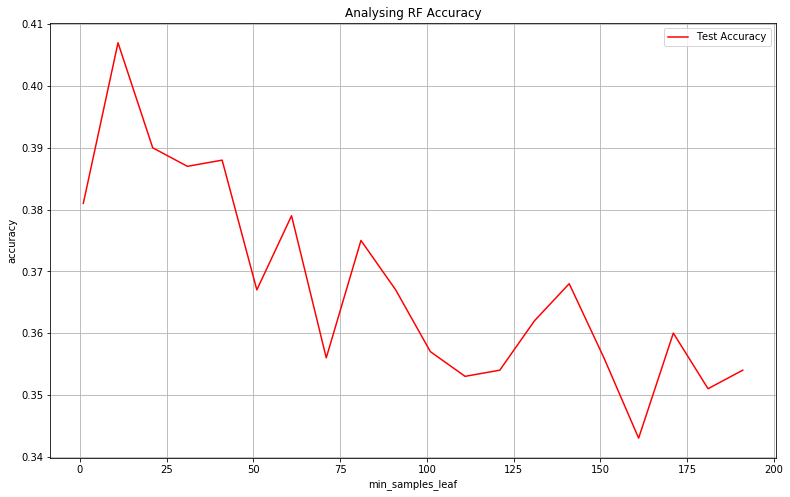

In [19]:
tune_range = range(1, 200, 10)
test_accuracy = []
print ("Random forest accuracy score")
for n in tune_range:
    rf = RandomForestClassifier(n_estimators=32, min_samples_leaf=n)
    rf.fit(principal_train_components, train_label)
        
    pred = rf.predict(principal_val_components)
    test_accuracy.append(accuracy_score(val_label, pred))
    
    print ("\tFor min_samples_leaf =", n, "test:", test_accuracy[-1])
    
plt.figure(figsize=(13,8))
plt.plot(tune_range, test_accuracy, '-r', label='Test Accuracy', c='red')
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.title('Analysing RF Accuracy')
plt.legend()
plt.grid()
plt.show()

&#x202b;
 تلاش برای tune کردن پارامتر max_features در جنگل تصادفی

Random forest accuracy score
	For max_features = 1 test: 0.316
	For max_features = 3 test: 0.378
	For max_features = 5 test: 0.402
	For max_features = 7 test: 0.38
	For max_features = 9 test: 0.403
	For max_features = 11 test: 0.399
	For max_features = 13 test: 0.391
	For max_features = 15 test: 0.415
	For max_features = 17 test: 0.394
	For max_features = 19 test: 0.375
	For max_features = 21 test: 0.382
	For max_features = 23 test: 0.379
	For max_features = 25 test: 0.381
	For max_features = 27 test: 0.387
	For max_features = 29 test: 0.398


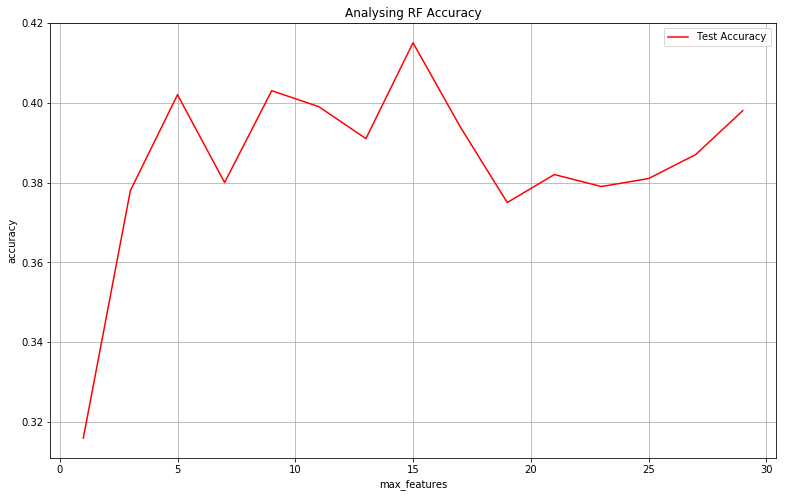

In [20]:
tune_range = range(1, 31, 2)
test_accuracy = []
print ("Random forest accuracy score")
for n in tune_range:
    rf = RandomForestClassifier(n_estimators=32, max_features=n)
    rf.fit(principal_train_components, train_label)
        
    pred = rf.predict(principal_val_components)
    test_accuracy.append(accuracy_score(val_label, pred))
    
    print ("\tFor max_features =", n, "test:", test_accuracy[-1])
    
plt.figure(figsize=(13,8))
plt.plot(tune_range, test_accuracy, '-r', label='Test Accuracy', c='red')
plt.xlabel("max_features")
plt.ylabel("accuracy")
plt.title('Analysing RF Accuracy')
plt.legend()
plt.grid()
plt.show()

&#x202b;
در نهایت با پارامترهای tune شده یک بار دیگر یک جنگل تصادفی ساختم و دقت آن را به دست آوردم ولی دقت مناسبی نداشت و در مجموع چندان بهتر نشده بود.

In [37]:
rf = RandomForestClassifier(n_estimators=170, min_samples_split=23, min_samples_leaf=11, max_features=15)
rf.fit(principal_train_components, train_label)

pred = rf.predict(principal_val_components)
test_accuracy = accuracy_score(val_label, pred)

print ("Tuned Random Forest", "test:", test_accuracy)

Tuned Random Forest test: 0.403


## SVM

In [21]:
from sklearn.svm import SVC

clf = SVC(gamma='scale')
clf.fit(principal_train_components, train_label)

pred = clf.predict(principal_train_components)
train_accuracy = accuracy_score(train_label, pred)

pred = clf.predict(principal_val_components)
test_accuracy = accuracy_score(val_label, pred)

print ("SVM accuracy score for PCA data")
print ("\ttrain:", train_accuracy, "test:", test_accuracy)

SVM accuracy score for PCA data
	train: 0.5161632653061224 test: 0.461


&#x202b;
با کرنل‌های مختلف  و با الگوبرداری از آموزش زیر، سعی به tune کردن SVC داشتم ولی باز هم به دقت چندان بهتری نسبت به حالت بالا نرسید.<br>
[SVC Tuning](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from datetime import datetime

kernels = ['rbf', 'poly']
print ("SVM accuracy score for PCA data")
for kernel in kernels:
  start = datetime.now()
  clf2 = SVC(kernel=kernel, gamma='scale')
  clf2.fit(principal_train_components, train_label)
  print("\tfit time:", datetime.now() - start)

  start = datetime.now()
  pred = clf2.predict(principal_train_components)
  train_accuracy = accuracy_score(train_label, pred)
  print("\ttrain time:", datetime.now() - start)

  start = datetime.now()
  pred = clf2.predict(principal_val_components)
  test_accuracy = accuracy_score(val_label, pred)
  print("\ttest time:", datetime.now() - start)

  print ("\tkernel:", kernel, "train:", train_accuracy, "test:", test_accuracy)

SVM accuracy score for PCA data
	fit time: 0:04:53.143572
	train time: 0:03:11.112219
	test time: 0:00:04.032161
	kernel: rbf train: 0.5161632653061224 test: 0.461
	fit time: 0:05:38.813848
	train time: 0:02:22.708409
	test time: 0:00:02.864499
	kernel: poly train: 0.4470612244897959 test: 0.357


### Run Algorythm on test data

&#x202b;
در نهایت با روش SVM داده‌های تست را پیشبینی و نتیجه‌ی آن را ذخیره کردم.

In [0]:
def export_result(algorythm, version):
  pred = algorythm.predict(principal_test_components)
  df = pd.DataFrame(data={'id': range(1, len(principal_test_components)+1), 'predict': pred})
  df.to_csv('submission-{}.csv'.format(version), index=False)

In [0]:
export_result(clf, version=3)

In [0]:
!cp submission-3.csv gdrive/My\ Drive/Colab\ Notebooks

In [41]:
!jupyter nbconvert --to html gdrive/My\ Drive/Colab\ Notebooks/CIFAR_10.ipynb

[NbConvertApp] Converting notebook gdrive/My Drive/Colab Notebooks/CIFAR_10.ipynb to html
[NbConvertApp] Writing 585496 bytes to gdrive/My Drive/Colab Notebooks/CIFAR_10.html


### جمع‌بندی
&#x202b;
با امتحان کردن روش‌های فوق و سرو کله زدن با آن‌ها به مدت دو روز، به این نتیجه رسیدم که برای دست‌یافتن به دقت بالاتر در این روش‌های باید سختی بسیار زیادی را کشید و بهینه‌سازی‌های زیادی انجام داد و دقت نیز به سختی زیاد می‌شود. ولی با روش‌های Deep Learning این مجموعه‌ی داده را می‌توان بسیار آسان‌تر پردازش کرد و به دقت بالای ۹۰ رسید که نشان‌ دهنده‌ی ضعف روش‌های فوق نسبت به روش Deep Learning در پردازش و تشخیص تصویر دارد.